In [3]:
from keras.applications import VGG16
from keras import layers,models
from keras import backend as K
import numpy as np
from keras.preprocessing import image

In [2]:
model=VGG16(weights='imagenet',include_top=False)

layer_name='block3_conv1'
filter_index=0

layer_output=model.get_layer(layer_name).output
loss=K.mean(layer_output[:,:,:,filter_index])

In [4]:
img_path='F:\\study\\ml\\DataSet\\dogs_vs_cats\\cats_and_dogs_small\\test\\cats\\cat.1700.jpg'

In [13]:
# img=image.load_img(img_path,target_size=(150,150))
# img_tensor=image.img_to_array(img)
# img_tensor=np.expand_dims(img_tensor,axis=0)
# img_tensor /=255.
# img_tensor.shape

# K.mean(img_tensor)


In [11]:
layer_output

<tf.Tensor 'block3_conv1/Relu:0' shape=(?, ?, ?, 256) dtype=float32>

In [17]:
grads=K.gradients(loss,model.input)[0]
grads/=(K.sqrt(K.mean(K.square(grads)))+1e-5)

In [18]:
grads

<tf.Tensor 'truediv:0' shape=(?, ?, ?, 3) dtype=float32>

In [27]:
iterate=K.function([model.input],[loss,grads])

In [28]:
loss_value,grads_value=iterate([np.zeros((1,150,150,3))])

In [32]:
loss_value.shape

()

In [29]:
grads_value.shape

(1, 150, 150, 3)

In [31]:
input_img_data=np.random.random((1,150,150,3))*20+128.
step=1.
for i in range(40):
    loss_value,grads_value=iterate([input_img_data])
    input_img_data+=grads_value*step

In [33]:
def deprocess_image(x):
    x-=x.mean()
    x/=(x.std() + 1e-5)
    x*=0.1
    
    x+=0.5
    x=np.clip(x,0,1)
    
    x*=255
    x=np.clip(x,0,255).astype('uint8')
    
    return x

In [34]:
def generate_pattern(layer_name,filter_index,size=150):
    layer_output=model.get_layer(layer_name).output
    loss=K.mean(layer_output[:,:,:,filter_index])
    
    grads=K.gradients(loss,model.input)[0]
    grads /=(K.sqrt(K.mean(K.square(grads)))+1e-5)
    iterate=K.function([model.input],[loss,grads])
    input_img_data=np.random.random(([1,size,size,3]))*20+128
    
    step=1.
    for i in range(40):
        loss_value,grads_value=iterate([input_img_data])
        input_img_data+=grads_value*step
        
    img=input_img_data[0]
    return deprocess_image(img)
    

In [35]:
import  matplotlib.pyplot as plt

In [38]:
# plt.imshow(generate_pattern('block3_conv1',0))

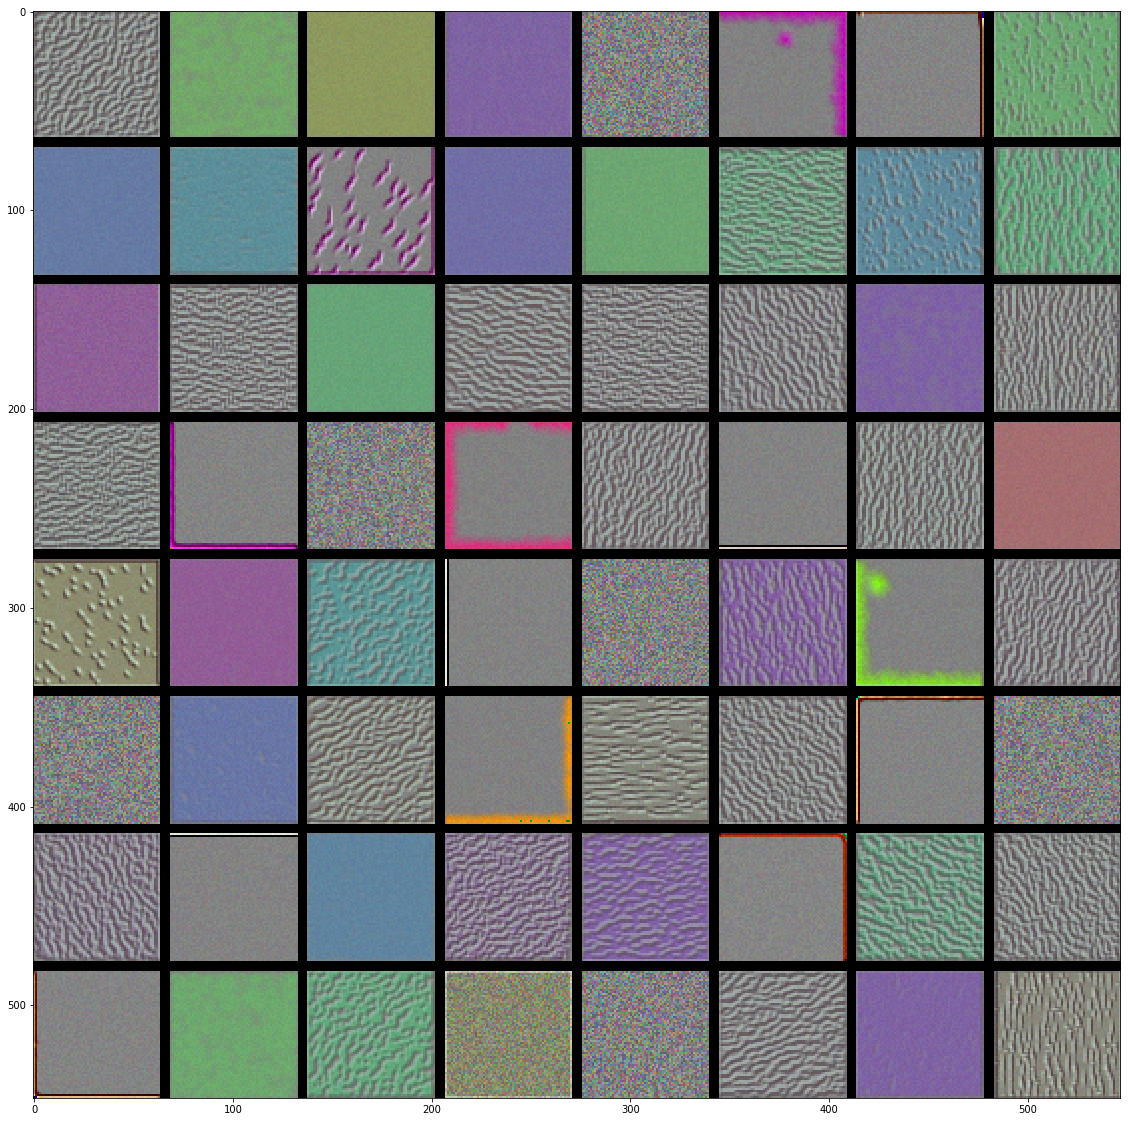

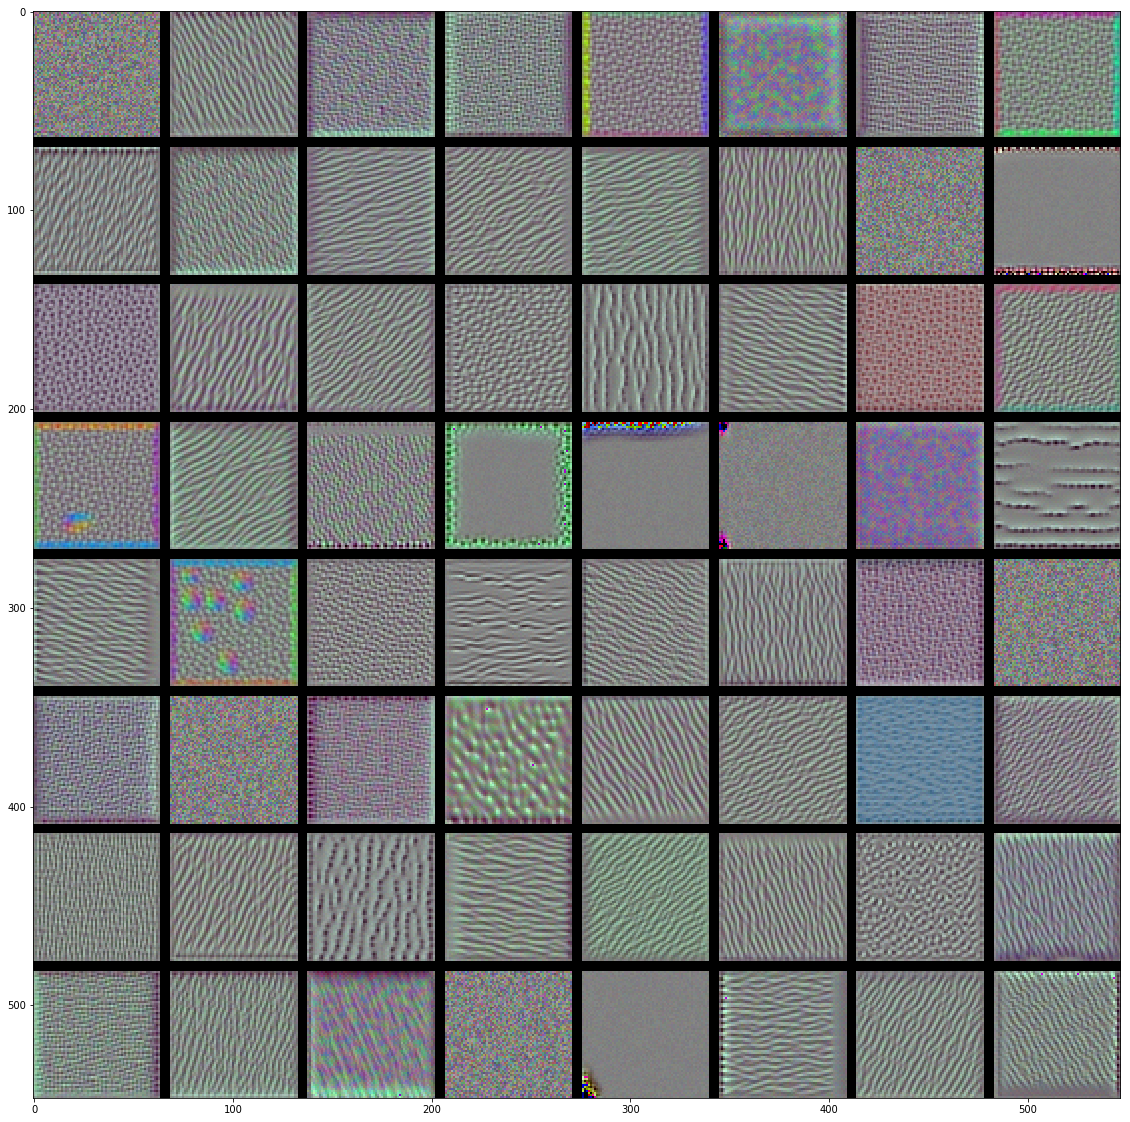

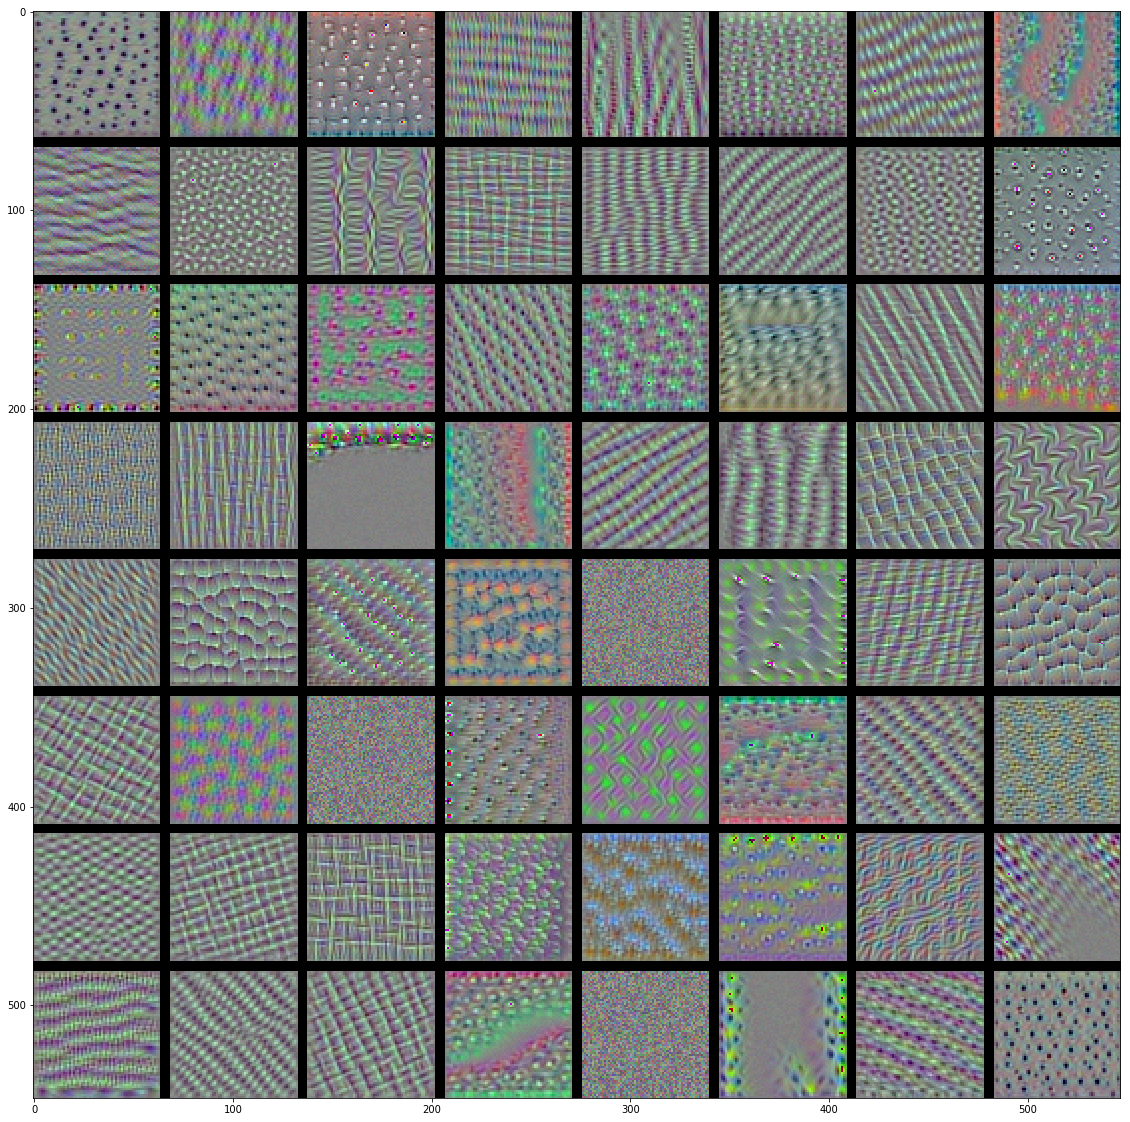

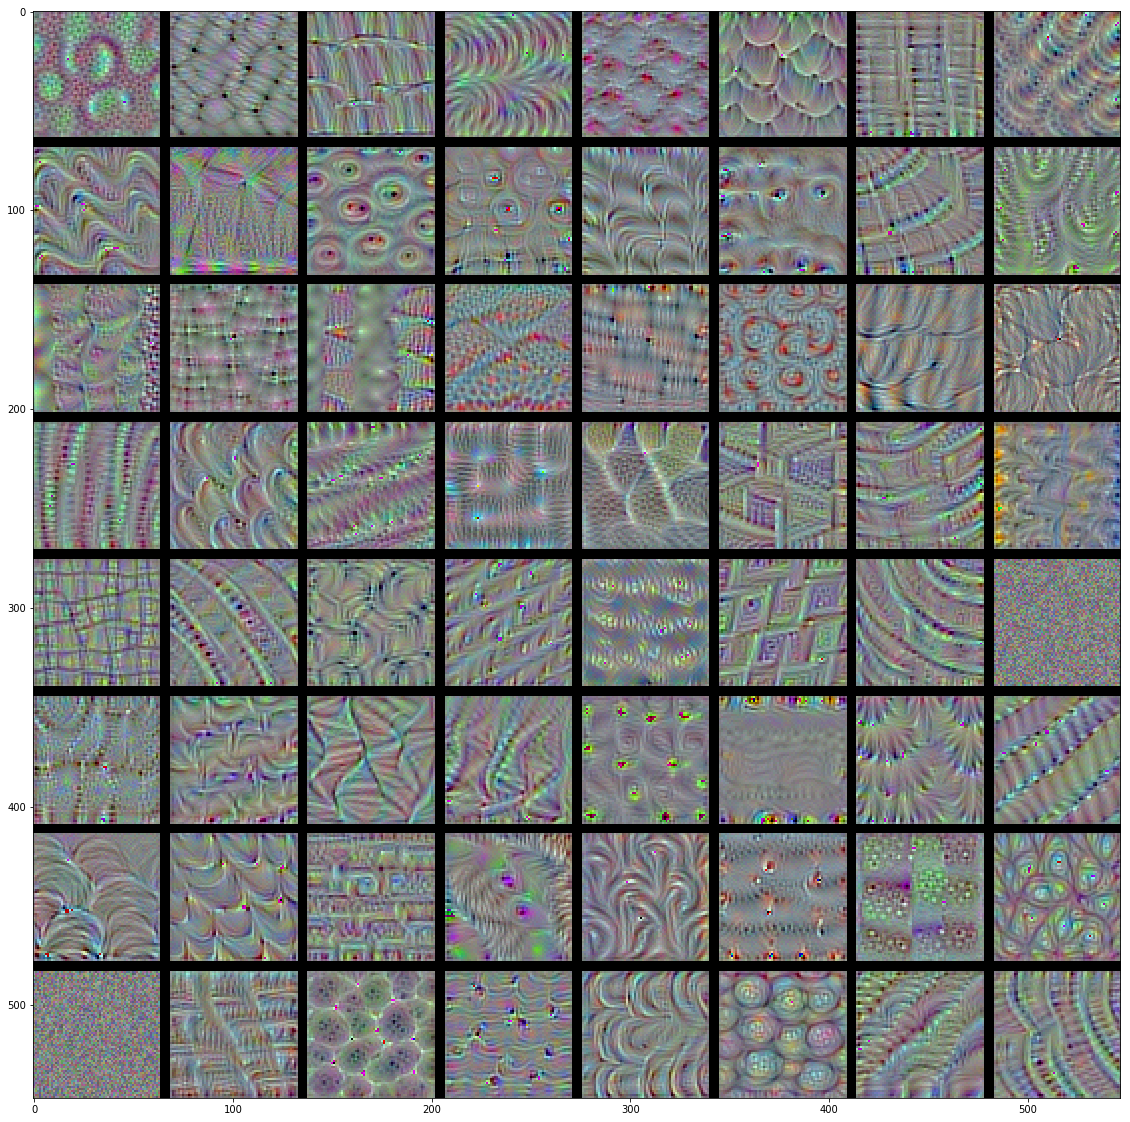

In [48]:
for layer_name in ['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1']:
    size=64
    margin=5

    results=np.zeros((8*size+7*margin,8*size+7*margin,3))
    
    for i in range(8):
        for j in range(8):
            filter_img=generate_pattern(layer_name,i+(j*8),size=size)

            horizontal_start=i*size+i*margin
            horizontal_end=horizontal_start+size
            vertical_start=j*size+j*margin
            vertical_end=vertical_start+size

            results[horizontal_start:horizontal_end,vertical_start:vertical_end,:]=filter_img

    plt.figure(figsize=(20,20))
    plt.imshow(results)
#     plt.show()

    

In [49]:
# for layer_name in ['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1']:
#     size = 64
#     margin = 5

#     # This a empty (black) image where we will store our results.
#     results = np.zeros((8 * size + 7 * margin, 8 * size + 7 * margin, 3))

#     for i in range(8):  # iterate over the rows of our results grid
#         for j in range(8):  # iterate over the columns of our results grid
#             # Generate the pattern for filter `i + (j * 8)` in `layer_name`
#             filter_img = generate_pattern(layer_name, i + (j * 8), size=size)

#             # Put the result in the square `(i, j)` of the results grid
#             horizontal_start = i * size + i * margin
#             horizontal_end = horizontal_start + size
#             vertical_start = j * size + j * margin
#             vertical_end = vertical_start + size
#             results[horizontal_start: horizontal_end, vertical_start: vertical_end, :] = filter_img

#     # Display the results grid
#     plt.figure(figsize=(20, 20))
#     plt.imshow(results)
#     plt.show()